In [1]:
import csv
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename, col_smiles=0, col_target=1, start_row=1, delimiter=' ', quotechar='\''):
    smiles = list()
    targets = list()
    with open(filename) as file:
        reader = csv.reader(file, delimiter=delimiter, quotechar=quotechar)
        for _ in range(start_row): #testiraj
            next(reader)
        for row in reader:
            if len(row) > 2:
                row = np.array(row)
                smiles.append(row[col_smiles])
                targets.append(row[col_target])
    return np.array(smiles), np.array(targets)

In [2]:
# read data
smiles,y = read_data('../data/BBBP.csv', col_smiles=3,col_target=2, delimiter=',')
# transform SMILES data to Mol
moles = np.array([AllChem.MolFromSmiles(x) for x in smiles])
# remove invalid ones
valid = [i for i,x in enumerate(moles) if x is not None]
y = np.array(y[valid], dtype=np.float)
moles = moles[valid]
smiles[0], y[0]

('[Cl].CC(C)NCC(O)COc1cccc2ccccc12', 1.0)

In [3]:
# create fingerprints
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(x, 4) for x in moles]
fingerprints[0]

In [4]:
# convert fingerprint object into numpy arrays
X = list()
for x in fingerprints:
    arr = np.zeros((0,))
    DataStructs.ConvertToNumpyArray(x, arr)
    X.append(arr)
X = np.array(X)
len(X[0]), sum(X[0])

(2048, 57.0)

In [5]:
# PCA dim reduction
pca = PCA(n_components=20)
pca_res = pca.fit_transform(X)

In [31]:
mds = MDS(n_components=2, verbose=1)
res = mds.fit_transform(pca_res)

In [6]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
res = tsne.fit_transform(pca_res)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2037 samples in 0.004s...
[t-SNE] Computed neighbors for 2037 samples in 0.309s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2037
[t-SNE] Computed conditional probabilities for sample 2000 / 2037
[t-SNE] Computed conditional probabilities for sample 2037 / 2037
[t-SNE] Mean sigma: 0.938488
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.729012
[t-SNE] KL divergence after 300 iterations: 1.199717


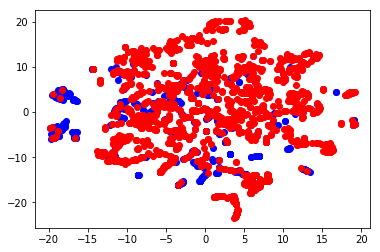

In [7]:
# crate simple matplot graph
fig, ax = plt.subplots()
plt.plot(np.array(res[:,0])[y==0], np.array(res[:,1])[y==0], 'bo', label='0')
plt.plot(np.array(res[:,0])[y==1], np.array(res[:,1])[y==1], 'ro', label='1')

plt.show()

In [ ]:
# show it with plotly if possible
try:
    from plotly.offline import init_notebook_mode, iplot
    import plotly.tools as tls
    init_notebook_mode(connected=True)
    plotly_fig = tls.mpl_to_plotly(plt.gcf())
    plotly_fig['layout']['showlegend'] = True
    iplot(plotly_fig)
except ImportError:
    pass